<a href="https://colab.research.google.com/github/Payal2000/ARIMA-Monthly-Champagne-Sales/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoregressive Integrated Moving Averages

1. Visualize the Time Series Data
2. Make the time series data stationary
3. PLot the correlation and Auto Correlation Charts
4. Construt ARIMA or Seasonal ARIMA based on the data
5. Use the model to predict the steps



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_url = "https://raw.githubusercontent.com/Payal2000/ARIMA-Monthly-Champagne-Sales/refs/heads/main/perrin-freres-monthly-champagne-.csv"
data = pd.read_csv(file_url)

In [3]:
# Reading first 5 rows
data.head(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
# Change the column names because they are unclear
data1 = data
data1.head(5)

data1.columns=["Month","Sales"]
data1.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
# Drop any nulls
data1.dropna(inplace=True)

In [15]:
data1.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


Month is in the form of string format.
Lets convert it into date-time format

In [17]:
data1['Month'] = pd.to_datetime(data1['Month'])
data1

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


ARIMA modeling require a datetime index.



In [18]:
data1.set_index('Month',inplace=True)
data1

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [19]:
data1.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 1: Visualize the Data


<Axes: xlabel='Month'>

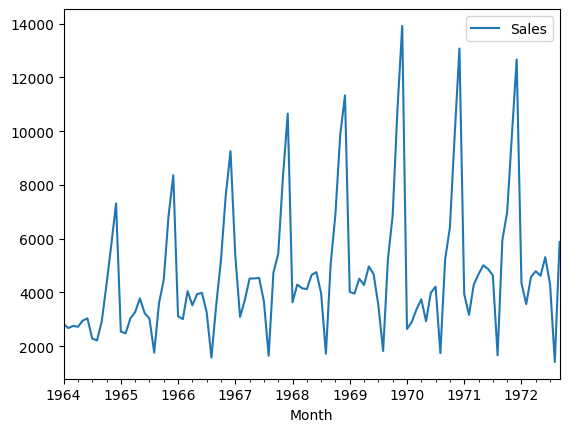

In [20]:
data1.plot()

📈 What the Plot Tells Us:
✅ Characteristics:
1. Trend: Overall upward — sales are increasing over time.

2. Seasonality: Strong yearly cycles — peaks around the same time each year.

3. Variance increases over time — this is common in business sales data.

Why This Matters:

ARIMA assumes a stationary time series (constant mean and variance). From this plot, we can tell:

We’ll need to difference the data (d=1) to remove the trend.